    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data

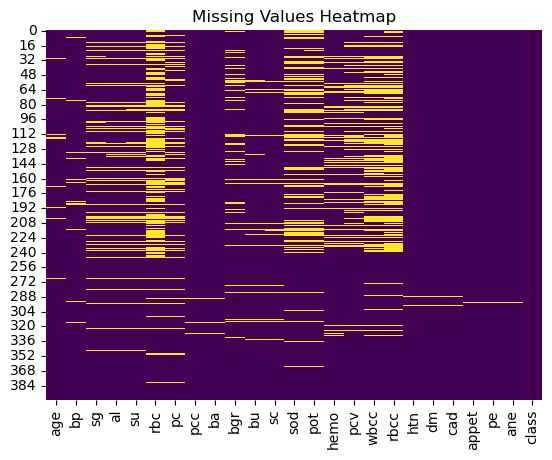

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset\\ckd_data.csv")

# Display first 5 rows
print(df.head())

# Summary of dataset
print(df.info())

# Count missing values
print(df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [2]:
from sklearn.impute import SimpleImputer

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert numerical columns to float
num_cols = ['age', 'bp', 'bgr', 'sc', 'hemo', 'rbcc', 'wbcc']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numerical values with mean
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Fill categorical missing values with most frequent
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Data cleaning completed.")


Data cleaning completed.


C:\Users\arish\AppData\Local\Temp\ipykernel_12296\1391493973.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("Categorical encoding completed.")


Categorical encoding completed.


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature scaling completed.")


Feature scaling completed.


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset\\ckd_cleaned.csv")

# Define features and target variable
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target (0: No CKD, 1: CKD)

# Check missing values before imputation
print("Missing values before imputation:\n", X.isnull().sum())

# Replace missing values with column mean (for numeric data)
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Confirm missing values are handled
print("Missing values after imputation:\n", X.isnull().sum())


Missing values before imputation:
 age       0
bp        0
sg       47
al       46
su       49
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu       19
sc        0
sod      87
pot      88
hemo      0
pcv      71
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
dtype: int64
Missing values after imputation:
 age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


In [6]:
df.to_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset/ckd_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
